In [35]:
import pandas as pd

import osmnx as ox
import geopandas as gpd

import matplotlib.pyplot as plt

In [36]:
dataPath = './data'

In [37]:
agency = pd.read_csv(f'{dataPath}/agency.txt')
stops = pd.read_csv(f'{dataPath}/stops.txt')
routes = pd.read_csv(f'{dataPath}/routes.txt')
calendar = pd.read_csv(f'{dataPath}/calendar.txt')
calendar_dates = pd.read_csv(f'{dataPath}/calendar_dates.txt')
shapes = pd.read_csv(f'{dataPath}/shapes.txt', low_memory=False)
trips = pd.read_csv(f'{dataPath}/trips.txt')
stop_times = pd.read_csv(f'{dataPath}/stop_times.txt')

In [45]:
shapesArray = []
shapeId = ''
lons = []
lats = []
for shape in shapes.iterrows():
    if (shapeId != shape[1]['shape_id']):
        df = pd.DataFrame(
            {
                "Latitude": lons,
                "Longitude": lats
            }
        )

        gdf = gpd.GeoDataFrame(
            df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326"
        )

        shapesArray.append(gdf)
        shapeId = shape[1]['shape_id']
        lons = []
        lats = []

    lon = shape[1]['shape_pt_lon']
    lat = shape[1]['shape_pt_lat']

    lons.append(lon)
    lats.append(lat)
shapesArray

[Empty GeoDataFrame
 Columns: [Latitude, Longitude, geometry]
 Index: [],
        Latitude  Longitude                     geometry
 0    153.023933 -27.553364  POINT (-27.55336 153.02393)
 1    153.023604 -27.553313   POINT (-27.55331 153.0236)
 2    153.023007 -27.553222  POINT (-27.55322 153.02301)
 3    153.022340 -27.552210  POINT (-27.55221 153.02234)
 4    153.021998 -27.551707    POINT (-27.55171 153.022)
 ..          ...        ...                          ...
 285  153.032101 -27.496436   POINT (-27.49644 153.0321)
 286  153.032260 -27.496450  POINT (-27.49645 153.03226)
 287  153.032377 -27.496464  POINT (-27.49646 153.03238)
 288  153.033437 -27.496628  POINT (-27.49663 153.03344)
 289  153.034083 -27.496731  POINT (-27.49673 153.03408)
 
 [290 rows x 3 columns],
        Latitude  Longitude                     geometry
 0    153.033615 -27.496731  POINT (-27.49673 153.03362)
 1    153.033561 -27.496724  POINT (-27.49672 153.03356)
 2    153.032415 -27.496559  POINT (-27.4965

In [48]:
shapesArray[1]

,Latitude,Longitude,geometry
0,153.023933,-27.553364,POINT (-27.55336 153.02393)
1,153.023604,-27.553313,POINT (-27.55331 153.0236)
2,153.023007,-27.553222,POINT (-27.55322 153.02301)
3,153.022340,-27.552210,POINT (-27.55221 153.02234)
4,153.021998,-27.551707,POINT (-27.55171 153.022)
...,...,...,...
285,153.032101,-27.496436,POINT (-27.49644 153.0321)
286,153.032260,-27.496450,POINT (-27.49645 153.03226)
287,153.032377,-27.496464,POINT (-27.49646 153.03238)
288,153.033437,-27.496628,POINT (-27.49663 153.03344)


In [7]:
brisbane_name = "Brisbane, Queensland, Australia"

In [63]:
area = ox.geocode_to_gdf(brisbane_name)
area.set_crs(crs="EPSG:4326")

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"MULTIPOLYGON (((152.67969 -27.37226, 152.6864 ...",152.679693,-27.660219,153.468235,-27.021544,23439576,relation,11677792,-27.468962,153.023501,boundary,administrative,12,0.702107,municipality,City of Brisbane,"City of Brisbane, Queensland, Australia"


<Axes: >

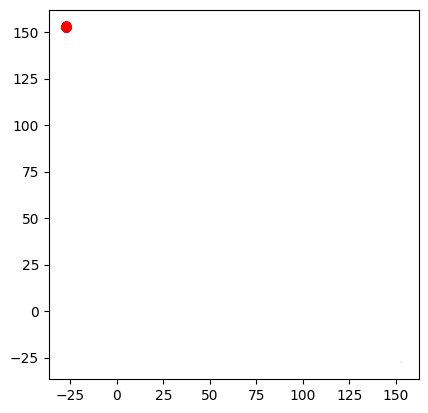

In [ ]:
f, ax = plt.subplots()
shapesArray[10].plot(ax=ax, aspect=1, color='red')
area.plot(ax=ax)
